In [10]:
import tensorflow as tf
from tensorflow import keras
from latent_space_visualisation import get_model
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [2]:
# 1. Read Model from Disk
# 2. Read some test data
# 3. Use Model.Encoder to predict x_test data and to store latent space in array
# 4. Plot latent space colored by y_test 

In [3]:
model = tf.keras.models.load_model('model.pb')

2023-05-04 16:31:01.929980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 16:31:01.949375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 16:31:01.949855: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 16:31:01.951876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 16:31:01.952296: I tensorflow/compile

In [27]:
model.get_layer('encoder').summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0   

In [4]:
(x_train, y_train), (x_test, y_test) = get_model.get_data('mnist')

In [5]:
x_test_encoded = model.get_layer('encoder').predict(x_test)

2023-05-04 16:31:04.677648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


 89/313 [=======>......................] - ETA: 0s

2023-05-04 16:31:05.397295: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-04 16:31:05.453427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


313/313 [==============================] - 2s 1ms/step


In [24]:
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=['d1', 'd2'])
x_test_encoded_df.loc[:, 'y'] = y_test

In [25]:
px.scatter(data_frame=x_test_encoded_df, x='d1', y='d2', color='y')

In [28]:
import plotly.graph_objs as go

# create sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 1, 4, 2]

# create scatter plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# add click event handler
fig.update_layout(clickmode='event+select')

def handle_click(trace, points, state):
    if points.point_inds:
        ind = points.point_inds[0]
        print(f'X: {x[ind]}, Y: {y[ind]}')

fig.data[0].on_click(handle_click)

# show plot
fig.show()

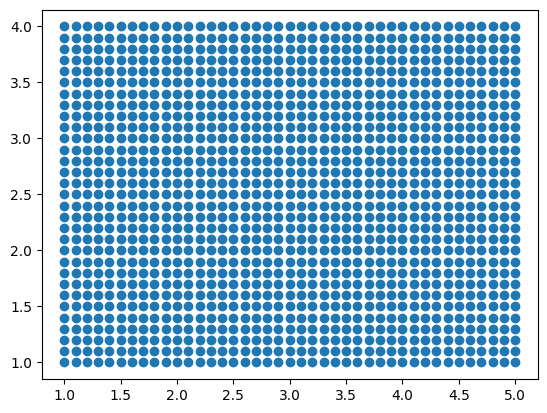

In [49]:
import numpy as np

min_x, max_x = np.floor(min(x)), np.ceil(max(x))
min_y, max_y = np.floor(min(y)), np.ceil(max(y))

xx, yy = np.meshgrid(np.arange(min_x, max_x+0.1, 0.1), np.arange(min_y, max_y+0.1, 0.1))
data = np.c_[xx.flatten(), yy.flatten()]
